In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

domains = ["speech", "music", "urban"]
teachers = []
X = []

for domain_id, domain in enumerate(domains):
    csv_path = os.path.join("Freqz", f"delta_{domain}.csv")
    df = pd.read_csv(csv_path)
    del df["Unnamed: 0"]
    teachers.append(df.columns[0])
    df.columns = ["Teacher"] + list(df.columns[1:])
    X.append(np.log10(np.array(df)))

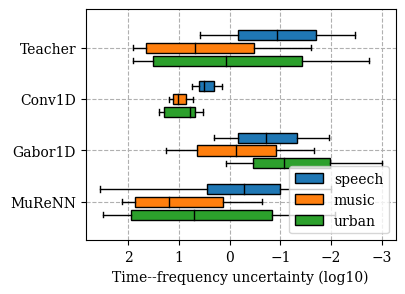

In [5]:
colors = ["tab:blue", "tab:orange", "tab:green"]


plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
})
plt.figure(figsize=(4, 3))
pos = np.arange(1, 5)
offsets = [-0.25, 0, 0.25]
for i in range(3):
    bp = plt.boxplot(X[i], widths=0.2, positions=pos+offsets[i], vert=False,
        patch_artist=True, boxprops=dict(facecolor=colors[i]), medianprops=dict(color='black'));
    bp["boxes"][0].set_label(domains[i])
    
plt.yticks(pos)
plt.gca().set_yticklabels(df.columns)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel("Time--frequency uncertainty (log10)")
plt.grid(linestyle="--")
plt.legend()

plt.savefig("Freqz/Plots/waspaa2023_filterbanks_fig-heisenberg.pdf")